In [1]:
%matplotlib inline
# Handle table-like data and matrices
import numpy as np
import pandas as pd
import re

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LassoLarsCV,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, RandomForestRegressor

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Visualisation
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
sns.set(style="ticks")

C:\Users\kefor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('athlete_events.csv')

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
pd.unique(df['Year'].sort_values())

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

In [6]:
male = df[df['Sex'] == "M"]
female = df[df['Sex'] == "F"]

Text(0.5,1,'Age Distribution by Gender')

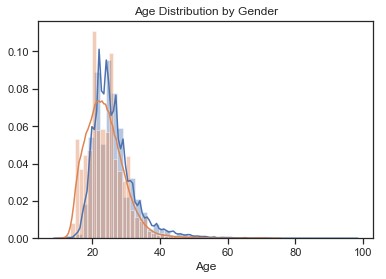

In [7]:
maleage = male['Age'].dropna()
femaleage = female['Age'].dropna()

sns.distplot(maleage)
sns.distplot(femaleage)
plt.title('Age Distribution by Gender')

Text(0.5,1,'Height Distribution by Gender')

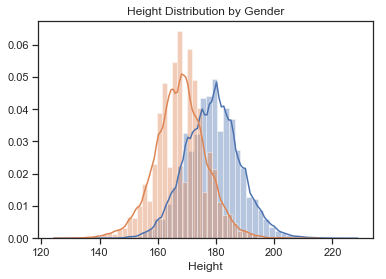

In [8]:
maleheight = male['Height'].dropna()
femaleheight = female['Height'].dropna()

sns.distplot(maleheight)
sns.distplot(femaleheight)
plt.title('Height Distribution by Gender')

Text(0.5,1,'Weight Distribution by Gender')

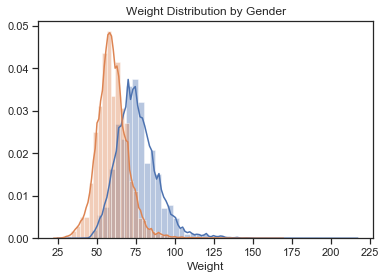

In [9]:
maleweight = male['Weight'].dropna()
femaleweight = female['Weight'].dropna()

sns.distplot(maleweight)
sns.distplot(femaleweight)
plt.title('Weight Distribution by Gender')

Splitting out Medal earns and Non-Medal Earners and additional splits by Gender

In [10]:
df["Weight to Height"] = df['Weight']/df['Height']

nomedal = df[(df['Medal'].isnull())]
medal = df[df['Medal'].notnull()]

mmedal = df[(df['Medal'].notnull()) & (df['Sex'] == 'M')]
fmedal = df[(df['Medal'].notnull()) & (df['Sex'] == 'F')]
mnomedal = df[(df['Medal'].isnull()) & (df['Sex'] == 'M')]
fnomedal = df[(df['Medal'].isnull()) & (df['Sex'] == 'F')]

(100, 220)

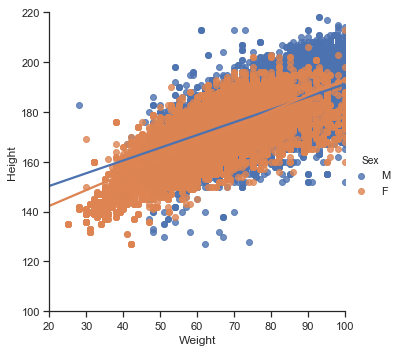

In [11]:
#sns.lmplot(x='Weight', y='Height', hue='Sex', data=nomedal)
sns.lmplot(x='Weight', y='Height', hue='Sex',  data=nomedal)
plt.xlim(20,100)
plt.ylim(100,220)

(100, 220)

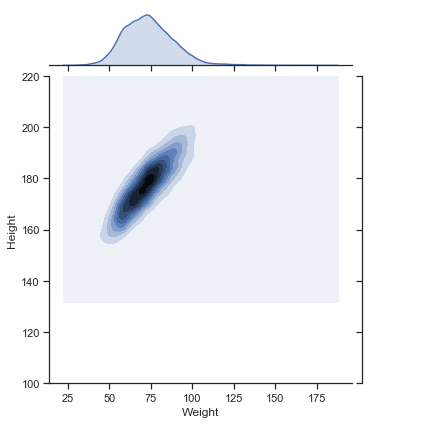

In [12]:
sns.jointplot(x='Weight', y='Height', kind="kde",  data=medal)

plt.xlim(20,100)
plt.ylim(100,220)

## Medal to Non-Medal Winners for Height and Weight

In [13]:
mmedalwh = mmedal['Weight to Height'].dropna()
fmedalwh = fmedal['Weight to Height'].dropna()
mnomedalwh = mnomedal['Weight to Height'].dropna()
fnomedalwh = fnomedal['Weight to Height'].dropna()

print(mmedalwh.median())
print(mnomedalwh.median())
print(fmedalwh.median())
print(fnomedalwh.median())

mmedalweight = mmedal['Weight'].dropna()
fmedalweight = fmedal['Weight'].dropna()
mnomedalweight = mnomedal['Weight'].dropna()
fnomedalweight = fnomedal['Weight'].dropna()

print(mmedalweight.median())
print(mnomedalweight.median())
print(fmedalweight.median())
print(fnomedalweight.median())

0.43023255814
0.412087912088
0.366863905325
0.35119047619
78.0
74.0
63.0
59.0


Text(0.5,1,'Male Weight Distribution for Non-Winners/Winners')

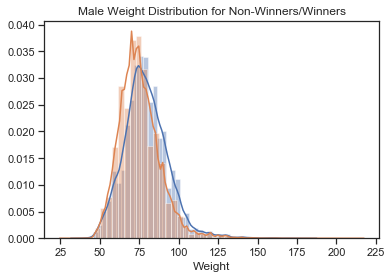

In [14]:
sns.distplot(mmedalweight)
sns.distplot(mnomedalweight)
plt.title('Male Weight Distribution for Non-Winners/Winners')

Text(0.5,1,'Female Weight Distribution for Non-Winners/Winner')

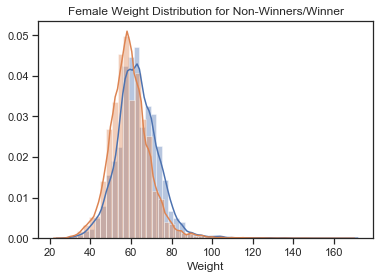

In [15]:
sns.distplot(fmedalweight)
sns.distplot(fnomedalweight)
plt.title('Female Weight Distribution for Non-Winners/Winner')

In [16]:
mmedalheight = mmedal['Height'].dropna()
fmedalheight = fmedal['Height'].dropna()
mnomedalheight = mnomedal['Height'].dropna()
fnomedalheight = fnomedal['Height'].dropna()

Text(0.5,1,'Female Height Distribution by Non-Winners/Winner')

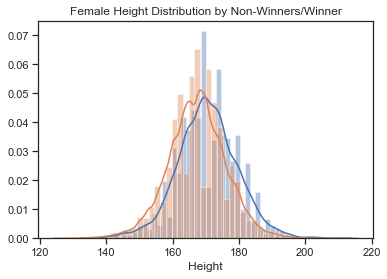

In [17]:
sns.distplot(fmedalheight)
sns.distplot(fnomedalheight)
plt.title('Female Height Distribution by Non-Winners/Winner')

Text(0.5,1,'Male Height Distribution by Non-Winners/Winner')

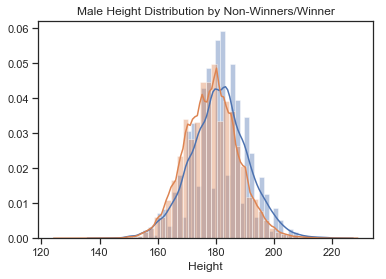

In [18]:
sns.distplot(mmedalheight)
sns.distplot(mnomedalheight)
plt.title('Male Height Distribution by Non-Winners/Winner')

## Top Performers

In [19]:
medalwinners = df[['Name','NOC','Year','Sport','Event','Medal','Season']].groupby(by=['Name','NOC','Year','Sport','Event','Medal'], as_index=False).count().sort_values(by=['Season'],ascending=0)
medalwinners = medalwinners[medalwinners['Medal'] != "None"]
medalwinners.head(10)

,Name,NOC,Year,Sport,Event,Medal,Season
3808,Balbir Singh,IND,1968,Hockey,Hockey Men's Hockey,Bronze,3
16152,Jacques le Lavasseur,FRA,1900,Sailing,Sailing Mixed 2-3 Ton,Gold,2
38430,Yang Yang,CHN,2002,Short Track Speed Skating,"Short Track Speed Skating Women's 3,000 metres...",Silver,2
16946,Jean-Baptiste tienne August Charcot,FRA,1900,Sailing,Sailing Mixed 0-0.5 Ton,Silver,2
34810,Texier I,FRA,1900,Sailing,Sailing Mixed 0-0.5 Ton,Silver,2
34811,Texier II,FRA,1900,Sailing,Sailing Mixed 0-0.5 Ton,Silver,2
38426,Yang Yang,CHN,1998,Short Track Speed Skating,"Short Track Speed Skating Women's 3,000 metres...",Silver,2
24833,Mathias Joseph Ferdinand Jules Henri Mialaret,FRA,1900,Sailing,Sailing Mixed 2-3 Ton,Silver,2
14240,Henri Lon Victor Susse,FRA,1900,Sailing,Sailing Mixed 2-3 Ton,Silver,2
16133,Jacques Doucet,FRA,1900,Sailing,Sailing Mixed 2-3 Ton,Silver,2


In [47]:
medalwinners = df[['Name','NOC','Medal','Season']].groupby(by=['Name','NOC','Medal'], as_index=False).count().sort_values(by=['Season'],ascending=0)
medalwinners[medalwinners['Medal'] == 'Gold'].head(10)

,Name,NOC,Medal,Season
21726,"Michael Fred Phelps, II",USA,Gold,23
25758,"Raymond Clarence ""Ray"" Ewry",USA,Gold,10
20792,Mark Andrew Spitz,USA,Gold,9
18360,Larysa Semenivna Latynina (Diriy-),URS,Gold,9
9407,"Frederick Carlton ""Carl"" Lewis",USA,Gold,9
24198,Paavo Johannes Nurmi,FIN,Gold,9
21305,"Matthew Nicholas ""Matt"" Biondi",USA,Gold,8
14663,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",USA,Gold,8
27580,Sawao Kato,JPN,Gold,8
23677,Ole Einar Bjrndalen,NOR,Gold,8


In [ ]:
topgold = ['Michael Fred Phelps, II', 'Raymond Clarence "Ray" Ewry', 'Frederick Carlton "Carl" Lewis', 'Paavo Johannes Nurmi', 'Mark Andrew Spitz', 'Larysa Semenivna Latynina (Diriy-)']

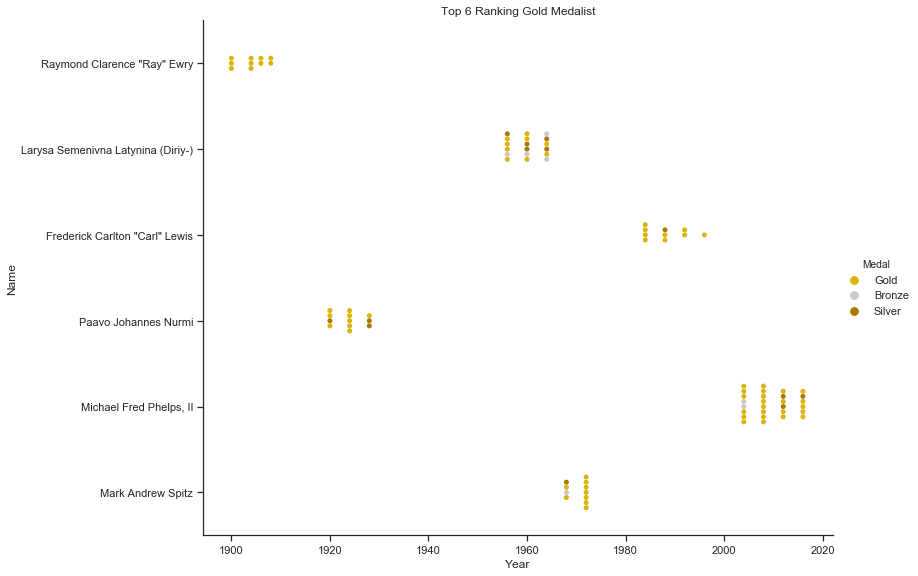

In [204]:
colors = ["gold", "silver","bronze"]
colors = sns.xkcd_palette(colors)


data = df[df['Name'].isin(topgold)]

with sns.color_palette(colors):
    sns.catplot(x='Year', y='Name', hue='Medal', height=8, kind='swarm', aspect=1.5, data=data)
    plt.title("Top 6 Ranking Gold Medalist")

In [21]:
data = df[df['Medal'] != 'None']
medalwinners = data[['Name','NOC','Season']].groupby(by=['Name','NOC'], as_index=False).count().sort_values(by=['Season'],ascending=0)
medalwinners.head(10)

,Name,NOC,Season
108552,Robert Tait McKenzie,CAN,58
47692,Heikki Ilmari Savolainen,FIN,39
64565,"Joseph ""Josy"" Stoffel",LUX,38
52831,Ioannis Theofilakis,GRE,36
120301,Takashi Ono,JPN,33
4714,Alexandros Theofilakis,GRE,32
4967,Alfrd (Arnold-) Hajs (Guttmann-),HUN,32
57685,Jean Lucien Nicolas Jacoby,LUX,32
60766,"Johann ""Hans"" Sauter",AUT,31
5108,Alfred James Munnings,GBR,31


In [62]:
top6medalist = ['Robert Tait McKenzie', 'Heikki Ilmari Savolainen', 'Joseph "Josy" Stoffel', 'Ioannis Theofilakis', 'Takashi Ono', 'Alexandros Theofilakis']

In [75]:
topparticipants = df[df['Name'].isin(top6medalist)]
topparticipants['Medal'] = topparticipants['Medal'].fillna('None')

C:\Users\kefor\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


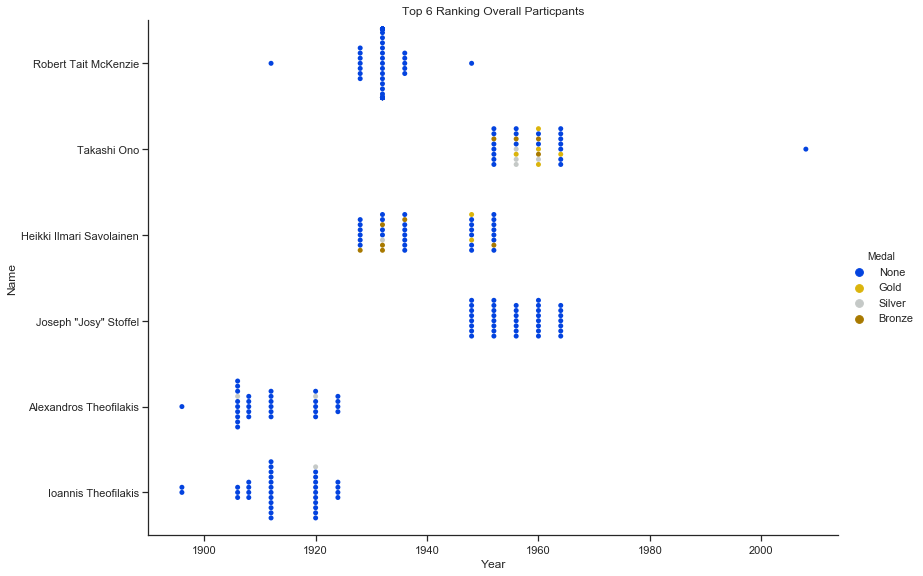

In [71]:
colors = ["blue","gold", "silver","bronze"]
colors = sns.xkcd_palette(colors)

data = topparticipants[topparticipants['Name'].isin(top6medalist)]

with sns.color_palette(colors):
    sns.catplot(x='Year', y='Name', hue='Medal', height=8, kind='swarm', hue_order=['None','Gold','Silver','Bronze'], aspect=1.5, data=data)
    plt.title("Top 6 Ranking Overall Particpants")


In [82]:
longest = df[['Name','NOC','Year','Event']].groupby(by=['Name','NOC','Year'], as_index=False).count().sort_values(by=['Name'],ascending=0)
longest = longest[['Name','NOC','Event']].groupby(by=['Name','NOC'], as_index=False).count().sort_values(by=['Event'],ascending=0)
longest.head(10)

,Name,NOC,Event
51299,Ian Millar,CAN,10
50790,Hubert Raudaschl,AUT,9
102860,Piero D'Inzeo,ITA,8
37167,Francisco Boza Dibos,PER,8
75794,Lesley Allison Thompson-Willie,CAN,8
99626,Paul Bert Elvstrm,DEN,8
104581,Raimondo D'Inzeo,ITA,8
84251,Mark James Todd,NZL,7
123086,Tinne Eva Caroline Wilhelmsson-Silfvn,SWE,7
74846,Lee Gyu-Hyeok,KOR,7


C:\Users\kefor\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


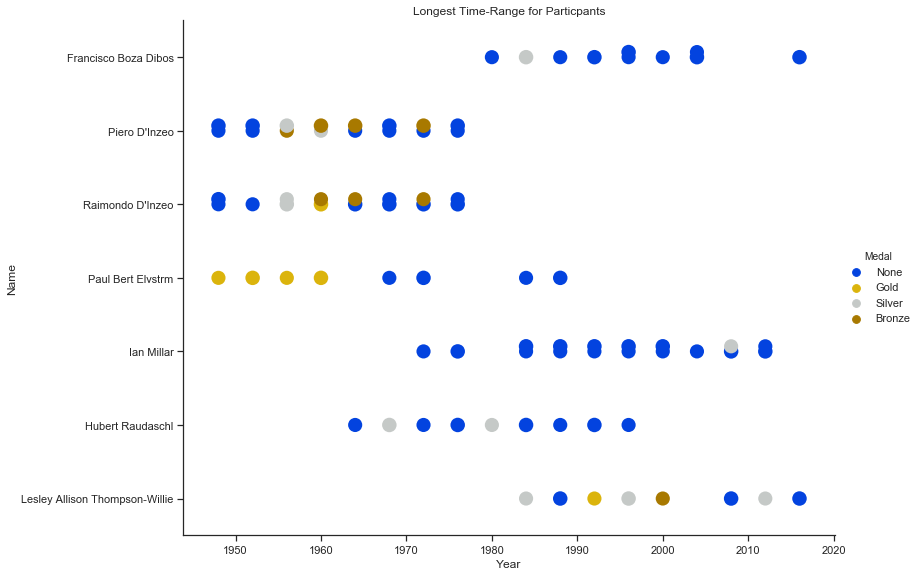

In [202]:
longestterm = ['Ian Millar', 'Hubert Raudaschl', "Piero D'Inzeo", 'Francisco Boza Dibos', 'Lesley Allison Thompson-Willie', 'Paul Bert Elvstrm', "Raimondo D'Inzeo"]
longestpart = df[df['Name'].isin(longestterm)]
longestpart['Medal'] = longestpart['Medal'].fillna('None')

colors = ["blue","gold", "silver","bronze"]
colors = sns.xkcd_palette(colors)

data = longestpart[longestpart['Name'].isin(longestterm)]

with sns.color_palette(colors):
    sns.catplot(x='Year', y='Name', hue='Medal', height=8, kind='swarm', hue_order=['None','Gold','Silver','Bronze'], aspect=1.5, data=data)
    plt.title("Longest Time-Range for Particpants")

## Seasons

In [24]:
pd.unique(df['Season'])

array(['Summer', 'Winter'], dtype=object)

In [25]:
# Returns summer and winter splits
summermedal = df[(df['Medal'] != "None") & (df['Season'] == "Summer")]
wintermedal = df[(df['Medal'] != "None") & (df['Season'] == "Winter")]


# Returns grouped with medal type split out and None dropped
summermedalsplit = summermedal[['Year','NOC','Medal','Team']].groupby(by=['Year','NOC','Medal'], as_index=False).count().sort_values(by='Year',ascending=0)
wintermedalsplit = wintermedal[['Year','NOC','Medal','Team']].groupby(by=['Year','NOC','Medal'], as_index=False).count().sort_values(by='Year',ascending=0)

# Returns with total medal count only, not split by medal type
summermedaltotal = summermedalsplit[['Year','NOC','Team']].groupby(by=['Year','NOC'], as_index=False).sum().sort_values(by='Year',ascending=0)
wintermedaltotal = wintermedalsplit[['Year','NOC','Team']].groupby(by=['Year','NOC'], as_index=False).sum().sort_values(by='Year',ascending=0)

#Total of unique particpants by year
par = df.drop_duplicates(['Name','Sex','Year','NOC'])
summerpar = par[(par['Season'] == "Summer")]
winterpar = par[(par['Season'] == "Winter")]

summerpartotal = summerpar[['Year','NOC','Team']].groupby(by=['Year','NOC'], as_index=False).count().sort_values(by='Year',ascending=0)
winterpartotal = winterpar[['Year','NOC','Team']].groupby(by=['Year','NOC'], as_index=False).count().sort_values(by='Year',ascending=0)

#merges medal count with total unique persons in each years game
summerratio = summermedaltotal.merge(summerpartotal, on=['Year','NOC'])
summerratio.columns = ['Year','NOC','Medals','Total']
summerratio['MPRatio'] =  summerratio['Medals'] / summerratio['Total']

winterratio = wintermedaltotal.merge(winterpartotal, on=['Year','NOC'])
winterratio.columns = ['Year','NOC','Medals','Total']
winterratio['MPRatio'] =  winterratio['Medals'] / winterratio['Total']

#split out with Gender included
summerpargendersplit = summerpar[['Year','NOC','Sex','Team']].groupby(by=['Year','NOC','Sex'], as_index=False).count().sort_values(by='Year',ascending=0)
winterpargendersplit = winterpar[['Year','NOC','Sex','Team']].groupby(by=['Year','NOC','Sex'], as_index=False).count().sort_values(by='Year',ascending=0)

summerpargendertotal = summerpar[['Year','Sex','Team']].groupby(by=['Year','Sex'], as_index=False).count().sort_values(by='Year',ascending=0)
winterpargendertotal = winterpar[['Year','Sex','Team']].groupby(by=['Year','Sex'], as_index=False).count().sort_values(by='Year',ascending=0)

## Gender Divide

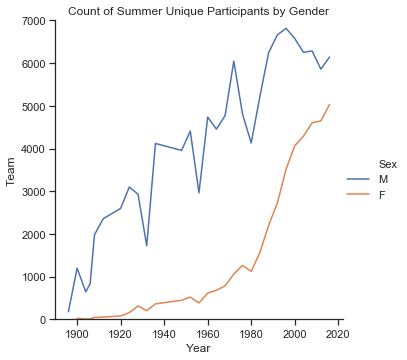

In [26]:
sns.relplot(x='Year',y='Team', hue='Sex', kind="line", data=summerpargendertotal)
plt.title('Count of Summer Unique Participants by Gender')
plt.ylim(0,7000)
plt.show()

In [27]:
summerpargendertotal[(summerpargendertotal['Year'] == 1980) | (summerpargendertotal['Year'] == 2016)]

,Year,Sex,Team
56,2016,M,6144
55,2016,F,5031
38,1980,M,4129
37,1980,F,1123


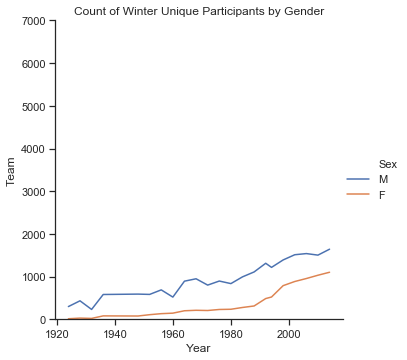

In [28]:
sns.relplot(x='Year',y='Team', hue='Sex', kind="line", data=winterpargendertotal)
plt.title('Count of Winter Unique Participants by Gender')
plt.ylim(0,7000)
plt.show()

In [29]:
winterpargendertotal[(winterpargendertotal['Year'] == 1980) | (winterpargendertotal['Year'] == 2014)]

,Year,Sex,Team
43,2014,M,1642
42,2014,F,1102
25,1980,M,836
24,1980,F,235


## Unique Sports and Events

In [30]:
sport = df.drop_duplicates(['Year','Season','Sport'])
summersport = sport[(sport['Season'] == "Summer")]
wintersport = sport[(sport['Season'] == "Winter")]

wintersportcount = wintersport[['Year', 'Sport']].groupby(by=['Year'], as_index=False).count().sort_values(by='Year',ascending=0)
wintersportcount['Season'] = "Winter"
summersportcount = summersport[['Year', 'Sport']].groupby(by=['Year'], as_index=False).count().sort_values(by='Year',ascending=0)
summersportcount['Season'] = "Summer"

sportcount = wintersportcount.append(summersportcount)

Text(0.5,1,'Count of Sports by Season')

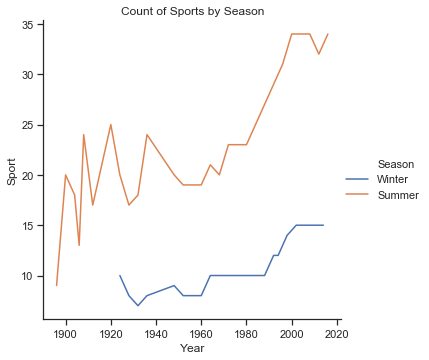

In [31]:
sns.relplot(x='Year', y='Sport', hue='Season', kind='line', data=sportcount)
plt.title("Count of Sports by Season")

In [32]:
event = df.drop_duplicates(['Year','Season','Sport','Event'])
summerevent = event[(event['Season'] == "Summer")]
winterevent = event[(event['Season'] == "Winter")]

wintereventcount = winterevent[['Year', 'Sport','Event']].groupby(by=['Year','Sport'], as_index=False).count().sort_values(by='Year',ascending=0)
wintereventtotal = wintereventcount[['Year', 'Event']].groupby(by=['Year'], as_index=False).sum().sort_values(by='Year',ascending=0)
wintereventtotal['Season'] = "Winter"

summereventcount = summerevent[['Year', 'Sport','Event']].groupby(by=['Year','Sport'], as_index=False).count().sort_values(by='Year',ascending=0)
summereventtotal = summereventcount[['Year', 'Event']].groupby(by=['Year'], as_index=False).sum().sort_values(by='Year',ascending=0)
summereventtotal['Season'] = "Summer"

eventtotals = wintereventtotal.append(summereventtotal)

Text(0.5,1,'Count of Events by Season')

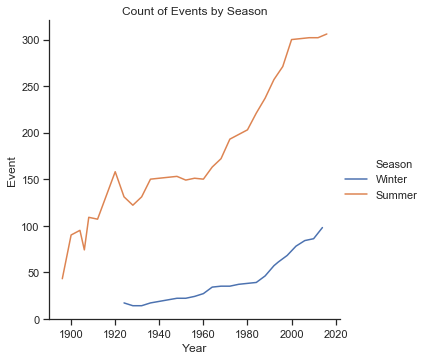

In [33]:
sns.relplot(x='Year', y='Event', hue='Season', kind='line', data=eventtotals)
plt.title("Count of Events by Season")

In [34]:
eventtotals[(eventtotals['Year'] == 2016) | (eventtotals['Year'] == 1924)  | (eventtotals['Year'] == 1896) | (eventtotals['Year'] == 2014)  ]

,Year,Event,Season
21,2014,98,Winter
0,1924,17,Winter
28,2016,306,Summer
7,1924,131,Summer
0,1896,43,Summer


## Medals and Trends

In [35]:
colors = ["gold","silver", "bronze", "windows blue"]
colors = sns.xkcd_palette(colors)

colorsmed = ["gold","blue", "green"]
colorsmed = sns.xkcd_palette(colorsmed)

summermedal = df[(df['Medal'] != "None") & (df['Season'] == "Summer")]
wintermedal = df[(df['Medal'] != "None") & (df['Season'] == "Winter")]


# Returns grouped with medal type split out and None dropped
summermedalsplit = summermedal[['Year','NOC','Medal','Team']].groupby(by=['Year','NOC','Medal'], as_index=False).count().sort_values(by='Year',ascending=0)
wintermedalsplit = wintermedal[['Year','NOC','Medal','Team']].groupby(by=['Year','NOC','Medal'], as_index=False).count().sort_values(by='Year',ascending=0)

# Returns with total medal count only, not split by medal type
summermedaltotal = summermedalsplit[['Year','NOC','Team']].groupby(by=['Year','NOC'], as_index=False).sum().sort_values(by='Year',ascending=0)
wintermedaltotal = wintermedalsplit[['Year','NOC','Team']].groupby(by=['Year','NOC'], as_index=False).sum().sort_values(by='Year',ascending=0)

#Total of unique particpants by year
par = df.drop_duplicates(['Name','Sex','Year','NOC'])
summerpar = par[(par['Season'] == "Summer")]
winterpar = par[(par['Season'] == "Winter")]

summerpartotal = summerpar[['Year','NOC','Team']].groupby(by=['Year','NOC'], as_index=False).count().sort_values(by='Year',ascending=0)
winterpartotal = winterpar[['Year','NOC','Team']].groupby(by=['Year','NOC'], as_index=False).count().sort_values(by='Year',ascending=0)

#merges medal count with total unique persons in each years game
summerratio = summermedaltotal.merge(summerpartotal, on=['Year','NOC'])
summerratio.columns = ['Year','NOC','Medals','Total']
summerratio['MPRatio'] =  summerratio['Medals'] / summerratio['Total']

winterratio = wintermedaltotal.merge(winterpartotal, on=['Year','NOC'])
winterratio.columns = ['Year','NOC','Medals','Total']
winterratio['MPRatio'] =  winterratio['Medals'] / winterratio['Total']


In [112]:
usasumsplit = summermedalsplit[summermedalsplit['NOC'] == "USA"].copy()
usasumsplit['Season'] = "Summer"
usawinsplit = wintermedalsplit[wintermedalsplit['NOC'] == "USA"].copy()
usawinsplit['Season'] = "Winter"

In [114]:
usasplit = usasumsplit.append(usawinsplit)
usasplit.columns = ['Year','NOC','Medal','Count','Season']

In [128]:
#summerpar
sumrat = summerratio[summerratio['NOC'] == 'USA']
sumrat = sumrat[['Year','NOC','Total']]
sumrat['Medal'] = "Total Participants"
sumrat['Season'] = "Summer"
sumrat.columns = ['Year','NOC','Count','Medal','Season']

winrat = winterratio[winterratio['NOC'] == 'USA']
winrat = winrat[['Year','NOC','Total']]
winrat['Medal'] = "Total Participants"
winrat['Season'] = "Winter"
winrat.columns = ['Year','NOC','Count','Medal','Season']

usasplitall = usasplit.append([sumrat,winrat])

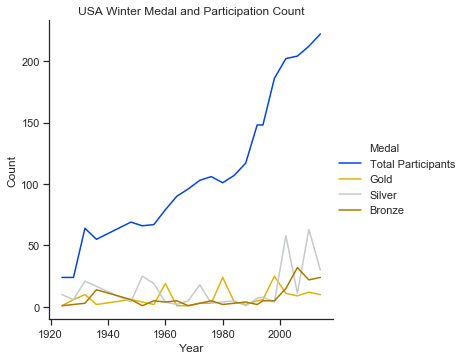

In [134]:
data = usasplitall[usasplitall['Season'] == 'Winter']

colors = ["blue","gold", "silver","bronze"]
colors = sns.xkcd_palette(colors)


with sns.color_palette(colors):
    sns.relplot(x='Year', y='Count', hue='Medal', kind='line', hue_order=['Total Participants','Gold','Silver','Bronze'], data=data)
    plt.title("USA Winter Medal and Participation Count")

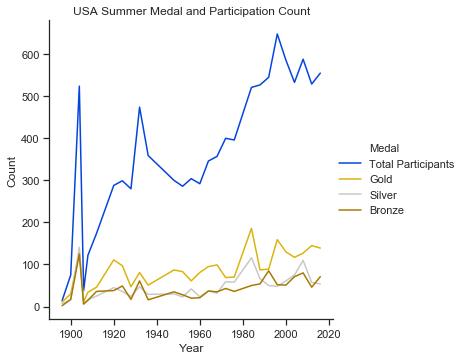

In [135]:
data = usasplitall[usasplitall['Season'] == 'Summer']

colors = ["blue","gold", "silver","bronze"]
colors = sns.xkcd_palette(colors)


with sns.color_palette(colors):
    sns.relplot(x='Year', y='Count', hue='Medal', kind='line', hue_order=['Total Participants','Gold','Silver','Bronze'], data=data)
    plt.title("USA Summer Medal and Participation Count")

In [146]:
summerratio[(summerratio['NOC'] == 'USA')]

,Year,NOC,Medals,Total,MPRatio
62,2016,USA,264,555,0.475676
147,2012,USA,248,529,0.468809
230,2008,USA,317,588,0.539116
308,2004,USA,263,533,0.493433
388,2000,USA,242,586,0.412969
466,1996,USA,259,648,0.399691
525,1992,USA,224,545,0.411009
585,1988,USA,207,527,0.392789
632,1984,USA,352,521,0.675624
714,1976,USA,164,396,0.414141


In [154]:
winterratio[(winterratio['NOC'] == 'USA')]

,Year,NOC,Medals,Total,MPRatio
0,2014,USA,64,222,0.288288
47,2010,USA,97,212,0.457547
69,2006,USA,52,204,0.254902
97,2002,USA,84,202,0.415842
115,1998,USA,34,186,0.182796
146,1994,USA,19,148,0.128378
166,1992,USA,14,148,0.094595
183,1988,USA,7,117,0.059829
187,1984,USA,9,107,0.084112
220,1980,USA,30,101,0.297030


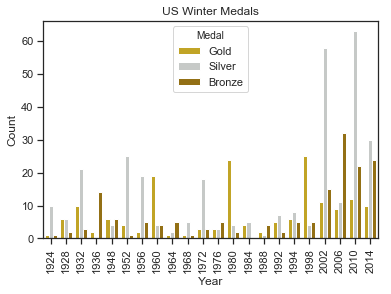

In [161]:
uswinmedalsplit = usasplitall[(usasplitall['Season'] == 'Winter') & (usasplitall['Medal'] != 'Total Participants')]
colors = ["gold", "silver","bronze"]
colors = sns.xkcd_palette(colors)


with sns.color_palette(colors):
    sns.barplot(x='Year',y='Count', hue='Medal', hue_order=['Gold','Silver','Bronze'], data=uswinmedalsplit)
    plt.title('US Winter Medals')
    plt.xticks(rotation=90)

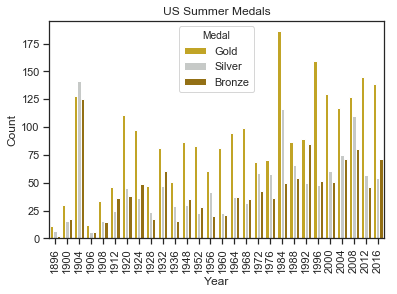

In [162]:
ussummedalsplit = usasplitall[(usasplitall['Season'] == 'Summer') & (usasplitall['Medal'] != 'Total Participants')]
colors = ["gold", "silver","bronze"]
colors = sns.xkcd_palette(colors)


with sns.color_palette(colors):
    sns.barplot(x='Year',y='Count', hue='Medal', hue_order=['Gold','Silver','Bronze'], data=ussummedalsplit)
    plt.title('US Summer Medals')
    plt.xticks(rotation=90)

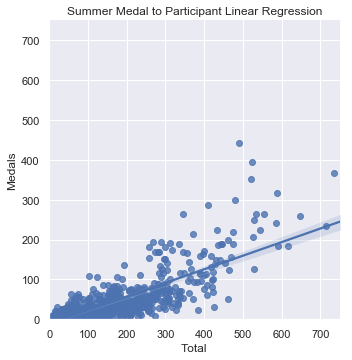

In [180]:
usaratio = summerratio[summerratio['NOC'] == 'CHI']

with sns.axes_style("darkgrid"):
    sns.lmplot(x="Total", y='Medals', data=summerratio)
    plt.title('Summer Medal to Participant Linear Regression')
    plt.ylim(0,750)
    plt.xlim(0,750)

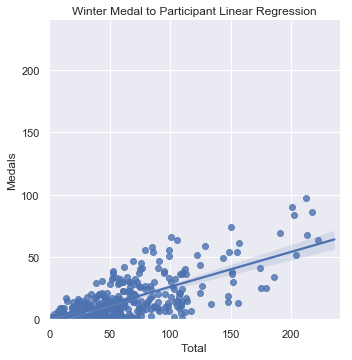

In [179]:
with sns.axes_style("darkgrid"):
    sns.lmplot(x="Total", y='Medals', data=winterratio)
    plt.title('Winter Medal to Participant Linear Regression')
    plt.ylim(0,240)
    plt.xlim(0,240)

In [177]:
winterratio.describe()

,Year,Medals,Total,MPRatio
count,382.000000,382.000000,382.000000,382.000000
mean,1979.371728,14.908377,60.259162,0.267138
std,26.125942,16.616391,42.038207,0.238373
min,1924.000000,1.000000,1.000000,0.009091
25%,1960.000000,3.000000,30.000000,0.094755
50%,1984.000000,9.000000,53.000000,0.203722
75%,2002.000000,20.000000,77.750000,0.364253
max,2014.000000,97.000000,222.000000,2.000000


In [183]:
summerratio.describe()

,Year,Medals,Total,MPRatio
count,1275.000000,1275.000000,1275.000000,1275.000000
mean,1974.550588,26.735686,110.701176,0.227399
std,33.644199,47.249778,114.318337,0.273224
min,1896.000000,1.000000,1.000000,0.005747
25%,1952.000000,2.000000,33.000000,0.064173
50%,1984.000000,8.000000,69.000000,0.155039
75%,2004.000000,29.000000,150.000000,0.285714
max,2016.000000,442.000000,735.000000,3.000000


In [283]:
avemed = winterratio[winterratio['NOC'] == "USA"]
avemed['Medals'].mean()

28.863636363636363

In [285]:
avemed = summerratio[summerratio['NOC'] == "USA"]
avemed['Medals'].mean()

178.64285714285714

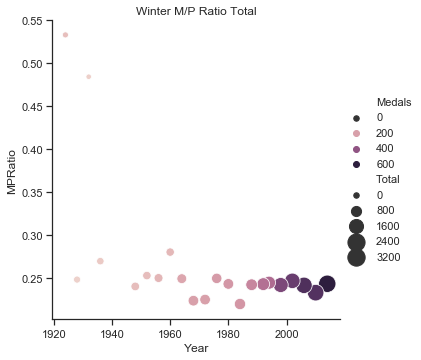

In [212]:
wintotalmp = winterratio[['Year','Medals','Total']].groupby('Year', as_index=False).sum().sort_values(by='Year',ascending=0)
wintotalmp['MPRatio'] = wintotalmp['Medals']/wintotalmp['Total']
wintotalmp



with sns.color_palette(sns.color_palette("Blues")):
    sns.relplot(x='Year',y='MPRatio', size='Total', hue='Medals', sizes=(30, 300), data=wintotalmp)
    plt.title('Winter M/P Ratio Total')

In [220]:
wineventtotals = eventtotals[eventtotals['Season'] == 'Winter']
wintotalmpevent = wintotalmp.merge(wineventtotals, on=['Year'])
del wintotalmpevent['Season']
wintotalmpevent['MERatio'] = wintotalmpevent['Medals']/wintotalmpevent['Event']

sumeventtotals = eventtotals[eventtotals['Season'] == 'Summer']
sumtotalmpevent = sumtotalmp.merge(sumeventtotals, on=['Year'])
del sumtotalmpevent['Season']
sumtotalmpevent['MERatio'] = sumtotalmpevent['Medals']/sumtotalmpevent['Event']

Text(0.5,1,'Winter Medal to Events Ratio')

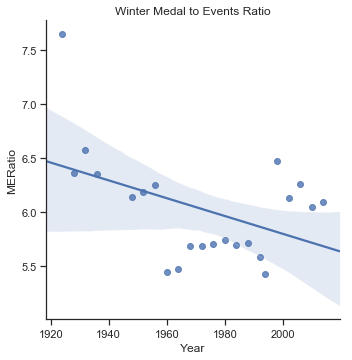

In [229]:
sns.lmplot(x='Year',y='MERatio',data=wintotalmpevent)
plt.title('Winter Medal to Events Ratio')

Text(0.5,1,'Summer Medal to Events Ratio')

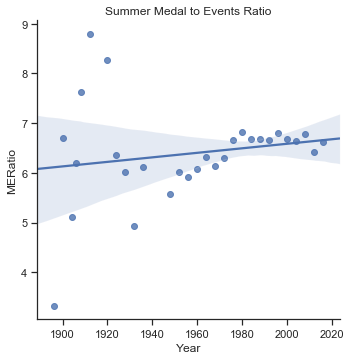

In [230]:
sns.lmplot(x='Year',y='MERatio',data=sumtotalmpevent)
plt.title('Summer Medal to Events Ratio')

In [235]:
wintotalmpevent.describe()

,Year,Medals,Total,MPRatio,Event,MERatio
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,1972.000000,258.863636,1046.318182,0.268768,43.318182,6.028940
std,27.512768,156.159349,676.909320,0.079067,25.589035,0.503767
min,1924.000000,89.000000,190.000000,0.220238,14.000000,5.426230
25%,1953.000000,138.750000,543.000000,0.242035,22.500000,5.687363
50%,1974.000000,205.000000,885.500000,0.244388,36.000000,6.069174
75%,1993.500000,327.750000,1340.000000,0.250313,60.000000,6.258929
max,2014.000000,597.000000,2449.000000,0.532787,98.000000,7.647059


In [238]:
sumtotalmpevent.describe()

,Year,Medals,Total,MPRatio,Event,MERatio
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1956.620690,1175.448276,4867.034483,0.314522,180.655172,6.387314
std,37.876127,537.438408,3075.134625,0.166595,76.501296,0.974338
min,1896.000000,143.000000,174.000000,0.193336,43.000000,3.325581
25%,1924.000000,832.000000,2617.000000,0.208924,131.000000,6.073333
50%,1960.000000,1029.000000,4465.000000,0.238389,158.000000,6.427152
75%,1988.000000,1582.000000,6937.000000,0.356474,237.000000,6.680000
max,2016.000000,2048.000000,10077.000000,0.821839,306.000000,8.794393


Text(0.5,1,'Summer M/P Ratio Total')

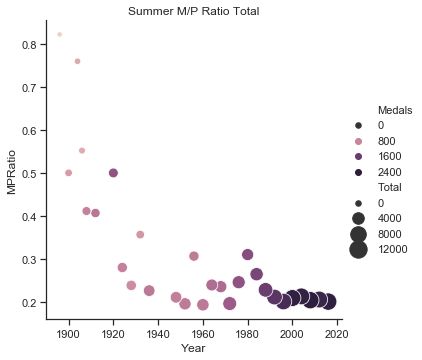

In [213]:
sumtotalmp = summerratio[['Year','Medals','Total']].groupby('Year', as_index=False).sum().sort_values(by='Year',ascending=0)
sumtotalmp['MPRatio'] = sumtotalmp['Medals']/sumtotalmp['Total']

sns.relplot(x='Year',y='MPRatio', size='Total', hue='Medals', sizes=(30, 300),data=sumtotalmp)
plt.title('Summer M/P Ratio Total')

In [266]:
summerratio['NOC'] = summerratio['NOC'].str.replace('URS','RUS')
summerratio['NOC'] = summerratio['NOC'].str.replace('SUN','RUS')
winterratio['NOC'] = winterratio['NOC'].str.replace('URS','RUS')
winterratio['NOC'] = winterratio['NOC'].str.replace('SUN','RUS')

Text(0.5,1,'Summer M/P Ratio by Country')

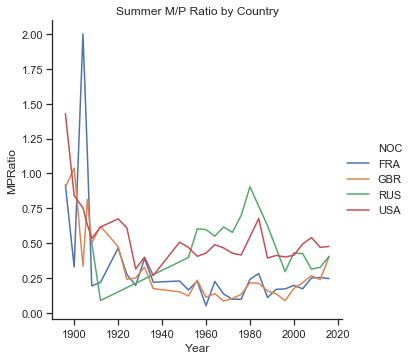

In [272]:

data = summerratio[(summerratio['NOC'] == 'USA') | (summerratio['NOC'] == 'FRA') | (summerratio['NOC'] == 'GBR') | (summerratio['NOC'] == 'RUS')]

sns.relplot(x='Year', y='MPRatio', hue='NOC', kind='line', data=data)
plt.title('Summer M/P Ratio by Country')

Text(0.5,1,'Winter Total Participants by Country')

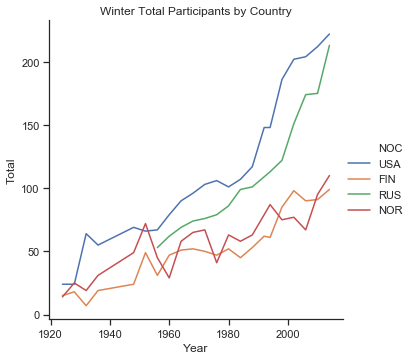

In [281]:
data = winterratio[(winterratio['NOC'] == 'USA') | (winterratio['NOC'] == 'NOR') | (winterratio['NOC'] == 'FIN') | (winterratio['NOC'] == 'RUS') ]

sns.relplot(x='Year', y='Total', hue='NOC', kind='line', data=data)
plt.title('Winter Total Participants by Country')

Text(0.5,1,'Summer Total Participation by Country')

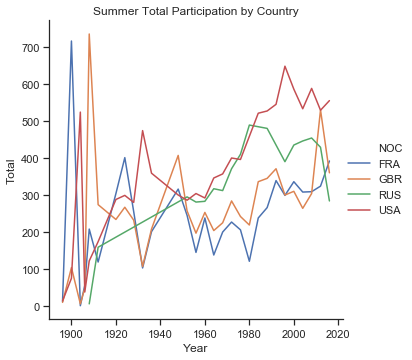

In [280]:
data = summerratio[(summerratio['NOC'] == 'USA') | (summerratio['NOC'] == 'FRA') | (summerratio['NOC'] == 'GBR') | (summerratio['NOC'] == 'RUS')]

sns.relplot(x='Year', y='Total', hue='NOC', kind='line', data=data)
plt.title('Summer Total Participation by Country')

In [92]:
noc = pd.get_dummies(df['NOC'], prefix='NOC')
sea = pd.get_dummies(df['Season'], prefix="Season")
spo = pd.get_dummies(df['Sport'], prefix='Sport')
med = pd.get_dummies(df['Medal'], prefix='Medal')
sex = pd.get_dummies(df['Sex'], prefix='Sex')

dfcor = df[['Age','Height','Weight','Year', 'Weight to Height']]
dfcor.append([noc,sea,spo,med,sex])
dfcor.head(5)

,Age,Height,Weight,Year,Weight to Height
0,24.0,180.0,80.0,1992,0.444444
1,23.0,170.0,60.0,2012,0.352941
2,24.0,NaN,NaN,1920,NaN
3,34.0,NaN,NaN,1900,NaN
4,21.0,185.0,82.0,1988,0.443243


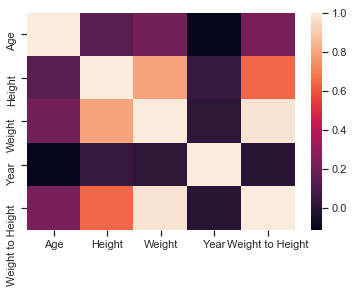

In [93]:
corr = dfcor.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)